In [1]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module
import src.utils.json

import src.comps.heads_pyramid_2

In [2]:
tab20_color_list =\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[0::2]] +\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[1::2]]

---

In [3]:
exp_data_all = {}

In [4]:
data_subdir_name = "ret_train"
backbone_name = "convnext_t"
exp_name_list = [
    "test_002"
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "exp_data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [5]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_t_s1"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [6]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_t_s2"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [0, 6, 7, 8, 9, 11]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [7]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "swint_v2_t_s1"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [13, 14, 15, 16]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [8]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "swint_v2_t_s2"
exp_name_list = [
    "run_{:03d}".format(idx) for idx in [2, 3, 4]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [9]:
exp_data_all.keys()

dict_keys(['ret_train', 'ret_train_old_smpl'])

In [10]:
exp_data_all["ret_train_old_smpl"].keys()

dict_keys(['convnext_t_s1', 'convnext_t_s2', 'swint_v2_t_s1', 'swint_v2_t_s2'])

---

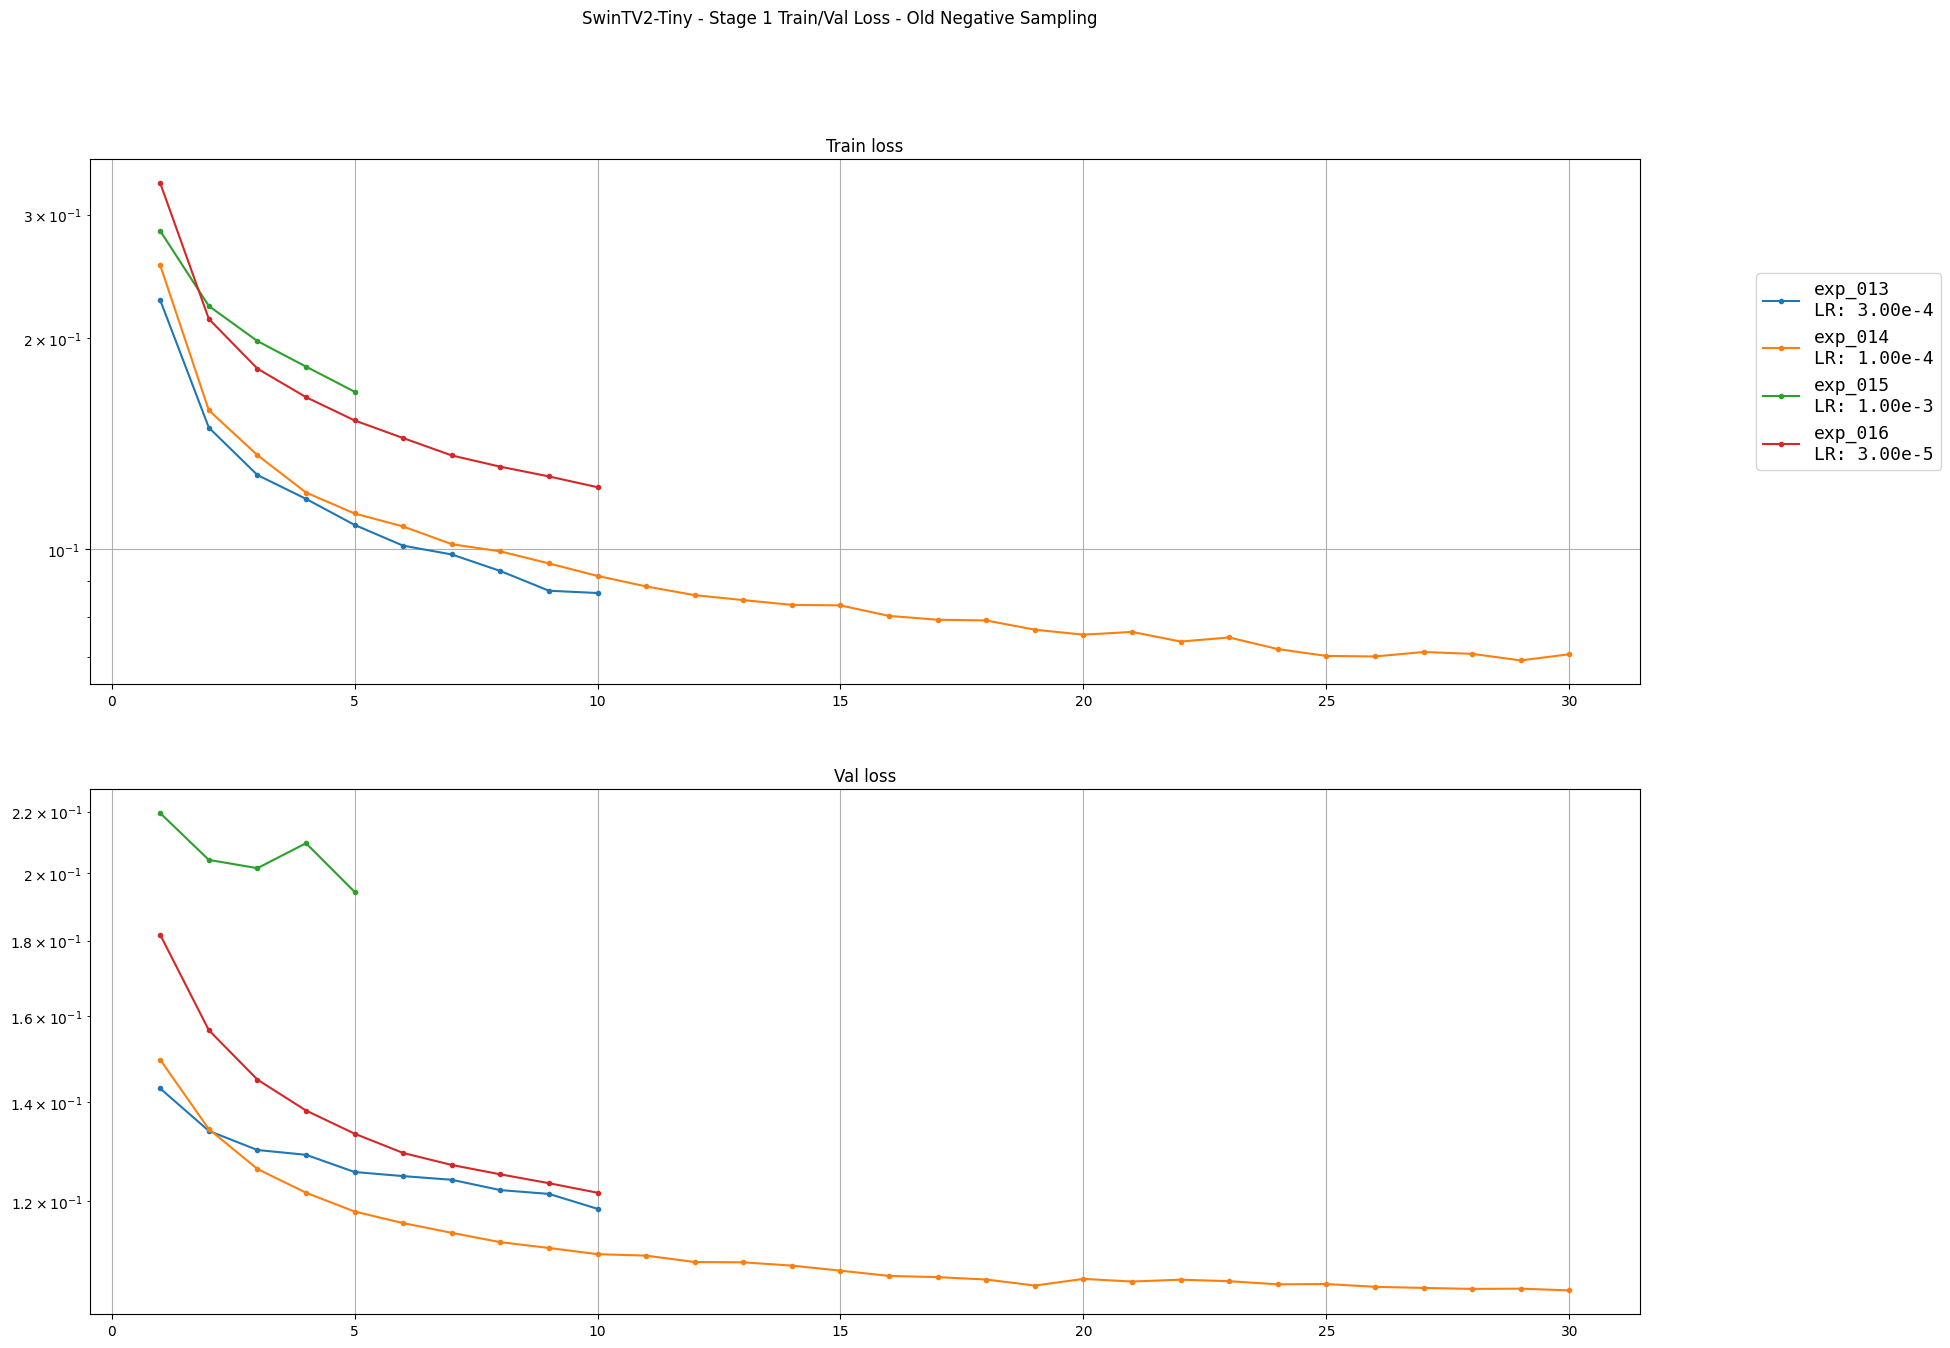

In [11]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["swint_v2_t_s1"].items()):

    # Load data

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

    finished = exp_data["results"]["stage_1"]["finished"]
    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    # Title

    title_lines = []
    title_lines.append("{:s}".format(exp_name))  
    if not finished: title_lines[-1] += " | Unifinished"
    title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plots

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Generic settings

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("SwinTV2-Tiny - Stage 1 Train/Val Loss - Old Negative Sampling")
plt.legend(prop={'family': 'monospace', "size": 13}, bbox_to_anchor=(1.20, 2.00))
plt.show()

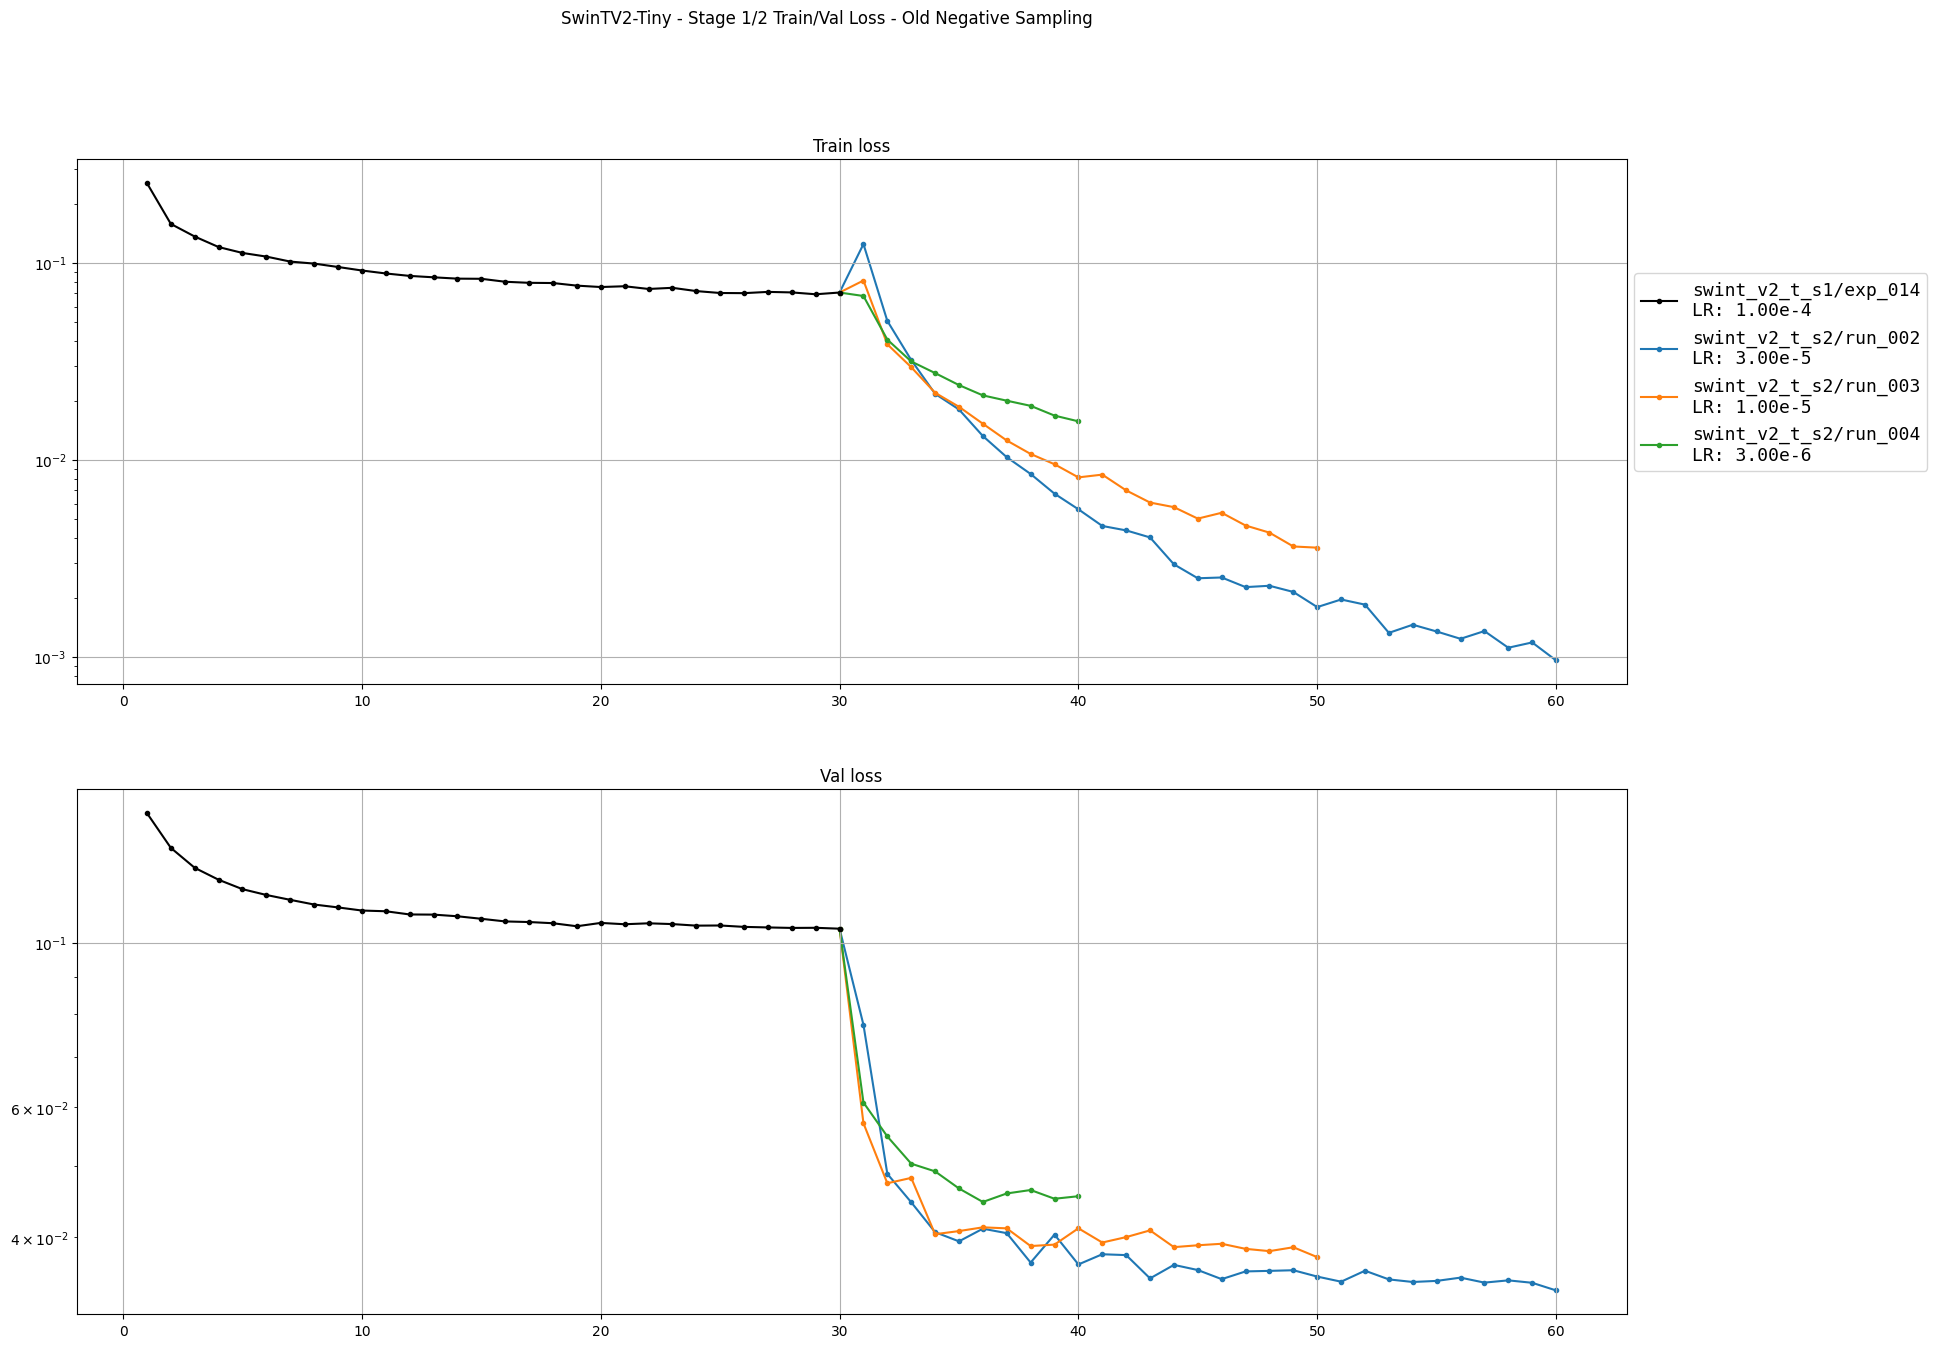

In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Stage 1

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["swint_v2_t_s1"].items()):

    if exp_name != "exp_014":
        continue

    # Load data

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

    finished = exp_data["results"]["stage_1"]["finished"]
    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}".format("swint_v2_t_s1", exp_name))  
    if not finished: title_lines[-1] += " | Unifinished"
    title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plots

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".", color="black")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".", color="black")

last_train_loss = train_loss_list[-1]
last_val_loss = val_loss_list[-1]

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["swint_v2_t_s2"].items()):

    # Load data

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_2"]["train_mean_loss_list"]]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_2"]["val_mean_loss_list"]]

    train_loss_list = [last_train_loss] + train_loss_list
    val_loss_list = [last_val_loss] + val_loss_list

    finished = exp_data["results"]["stage_2"]["finished"]
    base_lr = exp_data["settings"]["stage_2"]["optimizer"]["lr"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}".format("swint_v2_t_s2", exp_name))  
    if not finished: title_lines[-1] += " | Unifinished"
    title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plots

    axs[0].plot(range(30, len(train_loss_list) + 30), train_loss_list, label=label, marker=".", zorder=1)
    axs[1].plot(range(30, len(val_loss_list) + 30), val_loss_list, label=label, marker=".", zorder=1)

# Generic settings

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("SwinTV2-Tiny - Stage 1/2 Train/Val Loss - Old Negative Sampling")
plt.legend(prop={'family': 'monospace', "size": 13}, bbox_to_anchor=(1.20, 2.00))
plt.show()

Baseline             | 1.111006e-1
exp_000              | 7.73011e-2
exp_001              | 1.457667e-1
exp_002              | 1.581211e-1
exp_003              | 2.359832e-1
exp_004              | 1.615629e-1
exp_005              | 1.573234e-1
exp_006              | 7.732047e-2
exp_007              | 7.803418e-2
exp_008              | 7.850019e-2
exp_009              | 7.408736e-2
exp_010              | 8.006136e-2
exp_011              | 7.943708e-2


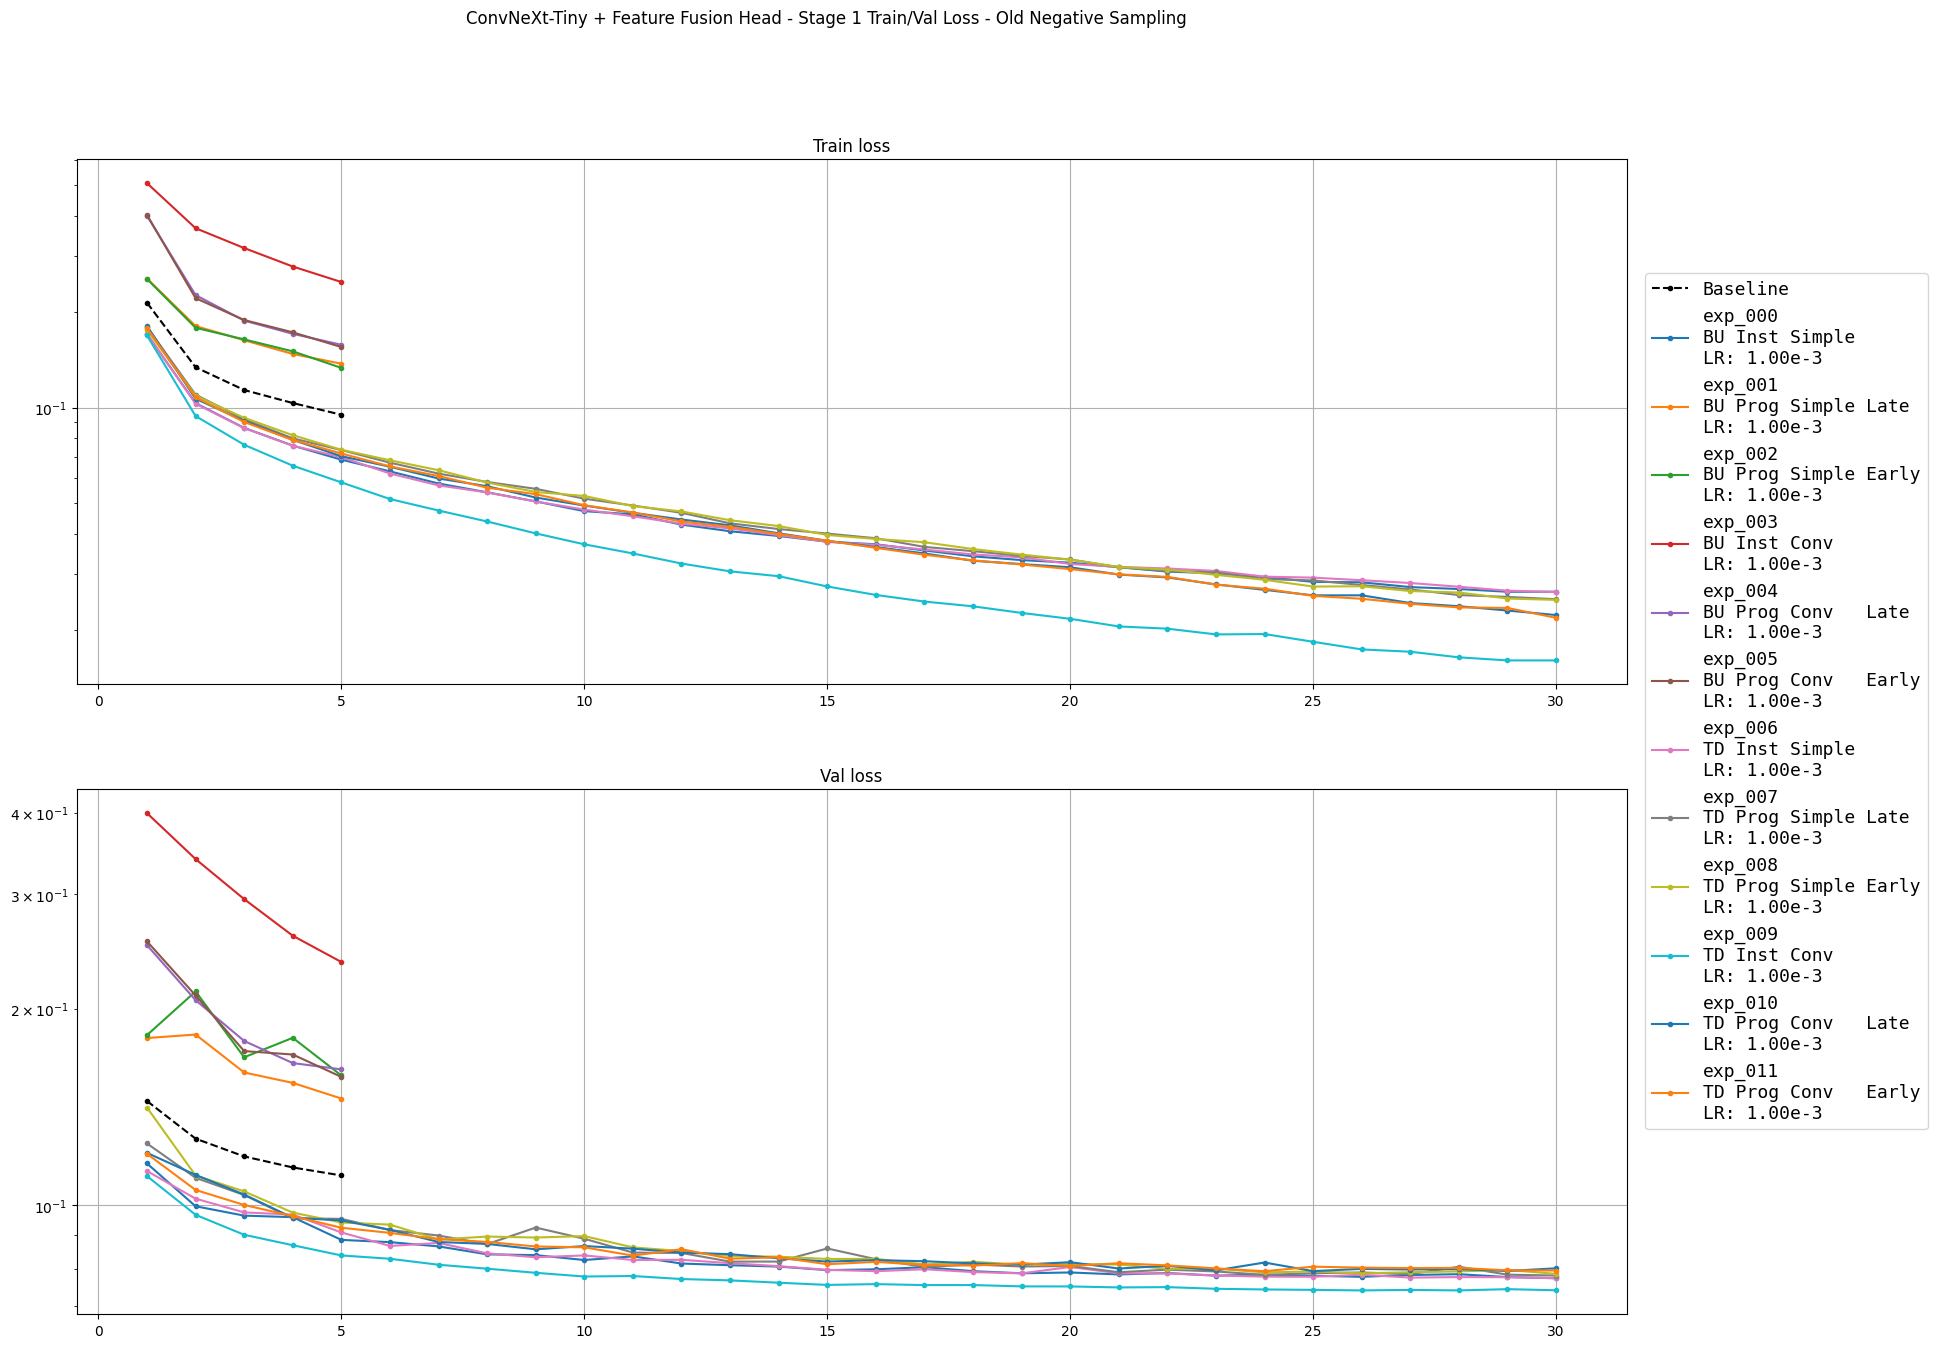

In [13]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Baseline

exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

finished = exp_data["results"]["stage_1"]["finished"]

label = "Baseline"

axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color="black", marker=".", linestyle="--")
axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color="black", marker=".", linestyle="--")

print("{:20s} | {:s}".format(label, np.format_float_scientific(val_loss_list[-1], precision=6, exp_digits=1)))

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["convnext_t_s1"].items()):

    # Load data

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

    finished = exp_data["results"]["stage_1"]["finished"]
    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    head_class = exp_data["settings"]["head"]["class"]
    head_order = "BU" if "BottomUp" in head_class else "TD"
    head_speed = "Inst" if "Instant" in head_class else "Prog"
    head_du_mode = "Simple" if "Simple" in head_class else "Conv"
    if head_speed == "Prog":
        head_weight = "Early" if exp_data["settings"]["head"]["emb_sizes"][0] == 512 else "Late"
    else:
        head_weight = ""

    # Title

    title_lines = []    
    title_lines.append("{:s}".format(exp_name))
    if not finished: title_lines[-1] += " | Unifinished"
    title_lines.append("{:2s} {:4s} {:6s} {:5s}".format(
        head_order,
        head_speed,
        head_du_mode,
        head_weight
    ))
    title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))

    label = "\n".join(title_lines)

    print("{:20s} | {:s}".format(exp_name, np.format_float_scientific(val_loss_list[-1], precision=6, exp_digits=1)))
    
    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Generic settings

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("ConvNeXt-Tiny + Feature Fusion Head - Stage 1 Train/Val Loss - Old Negative Sampling")
plt.legend(prop={'family': 'monospace', "size": 13}, bbox_to_anchor=(1.20, 2.00))
plt.show()

exp_000              | 4.610534e-2
exp_006              | 4.628728e-2
exp_007              | 5.513238e-2
exp_008              | 5.393946e-2
exp_009              | 5.508445e-2
exp_011              | 5.557127e-2


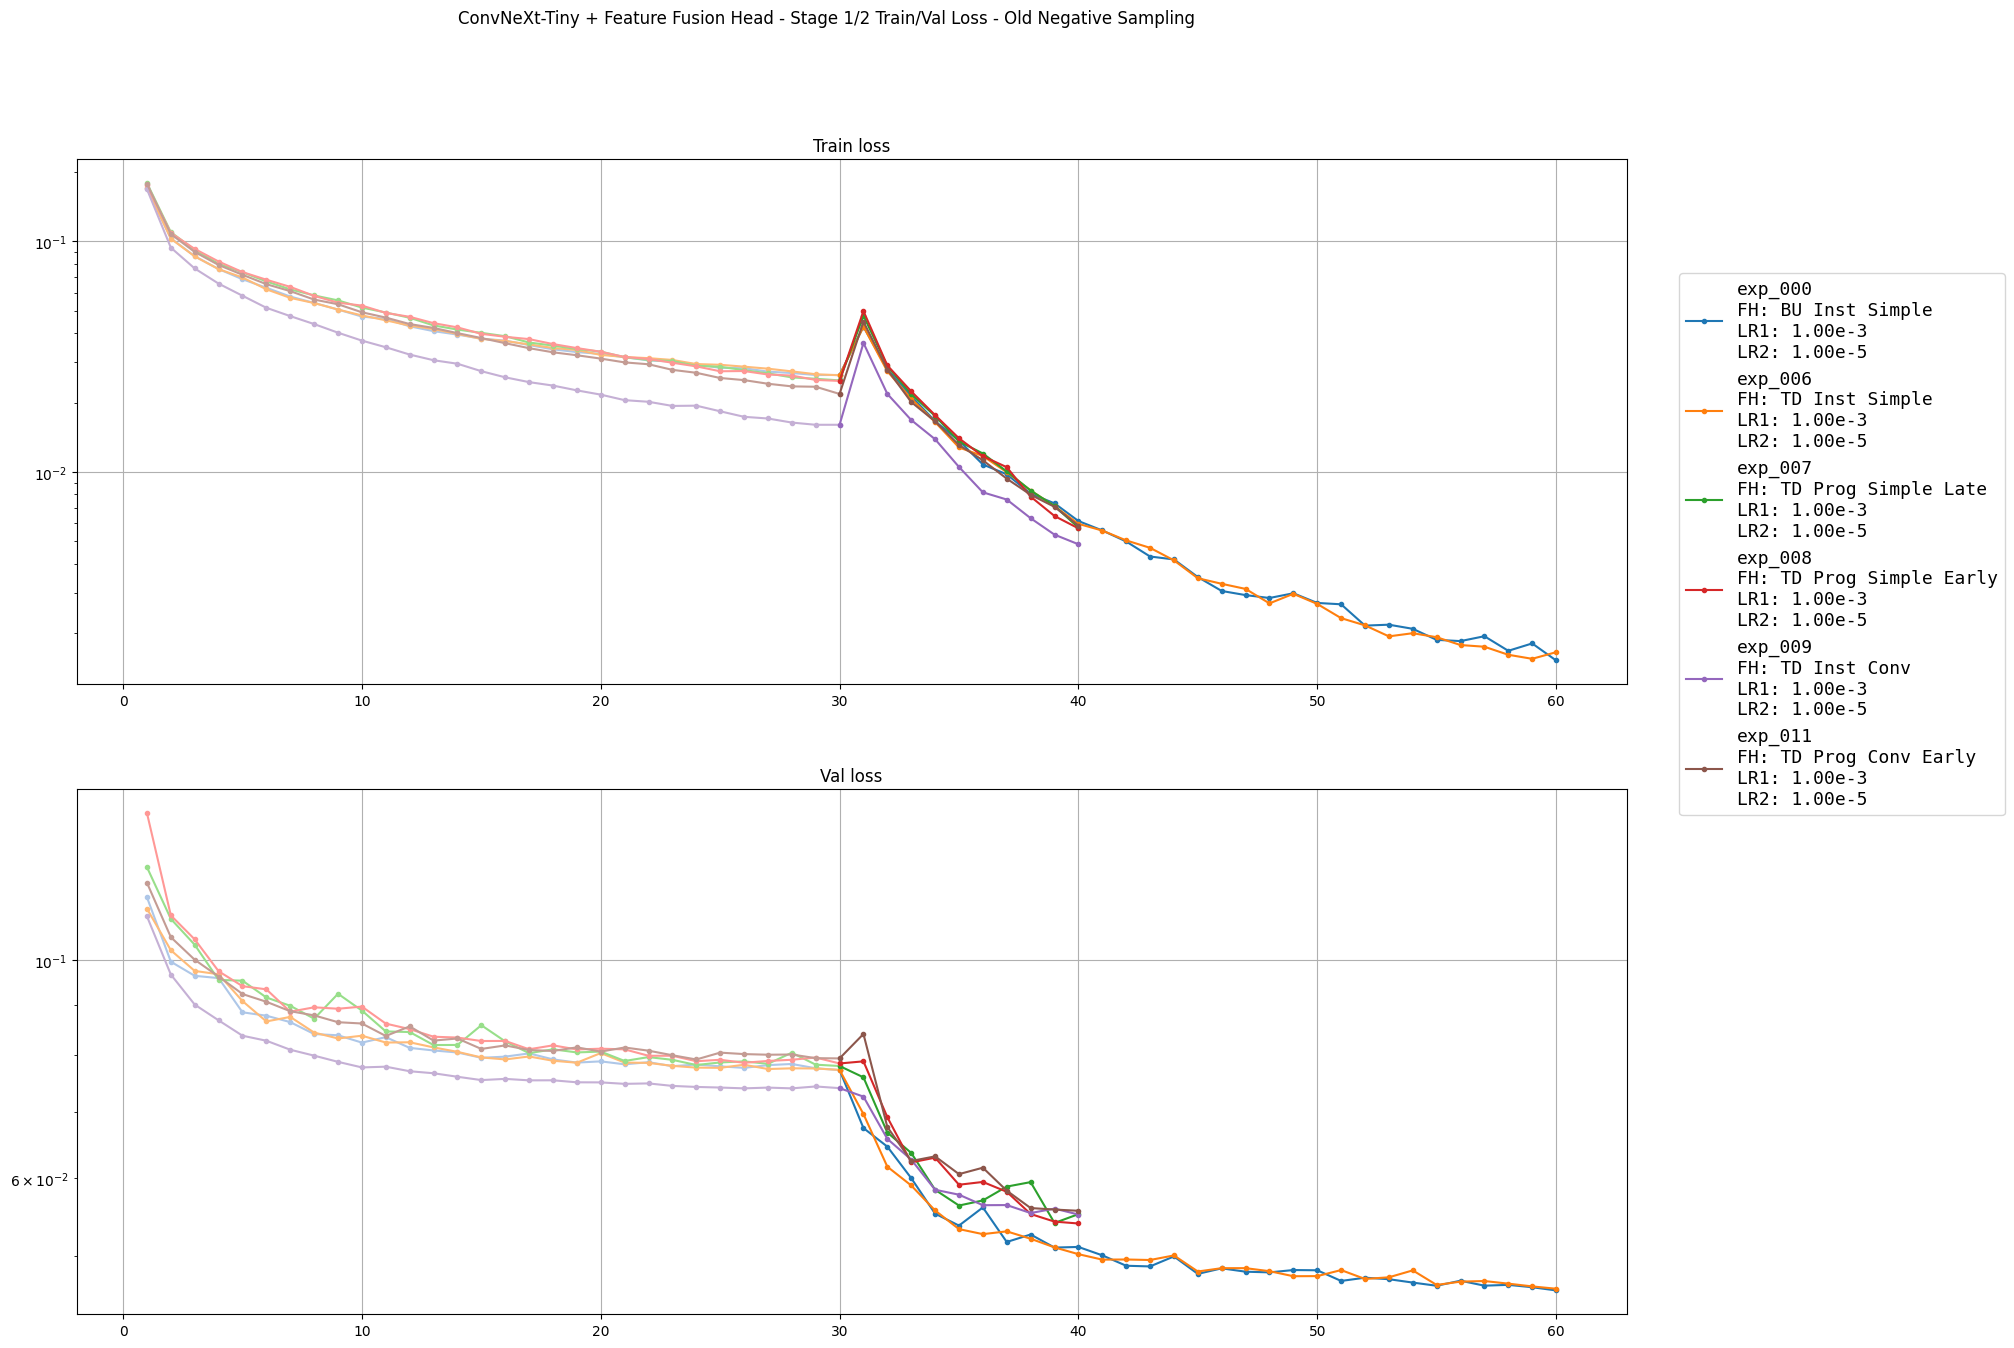

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Experiments

color_idx = 0

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["convnext_t_s1"].items()):

    if exp_name not in ["exp_000", "exp_006", "exp_007", "exp_008", "exp_009", "exp_011"]:
        continue

    # Stage 2 data

    exp_data_2 = exp_data_all["ret_train_old_smpl"]["convnext_t_s2"][exp_name]

    # Load data

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

    train_loss_list_2 = [train_loss_list[-1]] + [sum(l) for l in exp_data_2["results"]["stage_2"]["train_mean_loss_list"]]
    val_loss_list_2 = [val_loss_list[-1]] + [sum(l) for l in exp_data_2["results"]["stage_2"]["val_mean_loss_list"]]

    finished = exp_data_2["results"]["stage_2"]["finished"]
    base_lr_1 = exp_data["settings"]["stage_1"]["optimizer"]["lr"]
    base_lr_2 = exp_data_2["settings"]["stage_2"]["optimizer"]["lr"]

    head_class = exp_data["settings"]["head"]["class"]
    head_order = "BU" if "BottomUp" in head_class else "TD"
    head_speed = "Inst" if "Instant" in head_class else "Prog"
    head_du_mode = "Simple" if "Simple" in head_class else "Conv"
    if head_speed == "Prog":
        head_weight = "Early" if exp_data["settings"]["head"]["emb_sizes"][0] == 512 else "Late"
    else:
        head_weight = ""

    # Title

    title_lines = []    
    title_lines.append("{:s}".format(exp_name))
    if not finished: title_lines[-1] += " | Unifinished"
    title_lines.append("FH: {:s} {:s} {:s} {:s}".format(
        head_order,
        head_speed,
        head_du_mode,
        head_weight
    ))
    title_lines.append("LR1: {:s}".format(np.format_float_scientific(base_lr_1, min_digits=2, exp_digits=1)))
    title_lines.append("LR2: {:s}".format(np.format_float_scientific(base_lr_2, min_digits=2, exp_digits=1)))

    label = "\n".join(title_lines)

    print("{:20s} | {:s}".format(exp_name, np.format_float_scientific(val_loss_list_2[-1], precision=6, exp_digits=1)))
    
    # Color pre

    color = tab20_color_list[color_idx]
    color_2 = tab20_color_list[color_idx + 10]

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, marker=".", color=color_2)
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, marker=".", color=color_2)

    axs[0].plot(range(30, len(train_loss_list_2) + 30), train_loss_list_2, label=label, marker=".", color=color)
    axs[1].plot(range(30, len(val_loss_list_2) + 30), val_loss_list_2, label=label, marker=".", color=color)

    # Color post

    color_idx += 1

# Generic settings

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("ConvNeXt-Tiny + Feature Fusion Head - Stage 1/2 Train/Val Loss - Old Negative Sampling")
plt.legend(prop={'family': 'monospace', "size": 13}, bbox_to_anchor=(1.25, 2.00))
plt.show()